In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis 

relationship_df = pd.read_csv('country_relationship.csv')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df,
                            source = "source",
                            target = "target",
                            edge_attr =  "value",
                            create_using = nx.Graph())

#### Graph visualization - Networkx

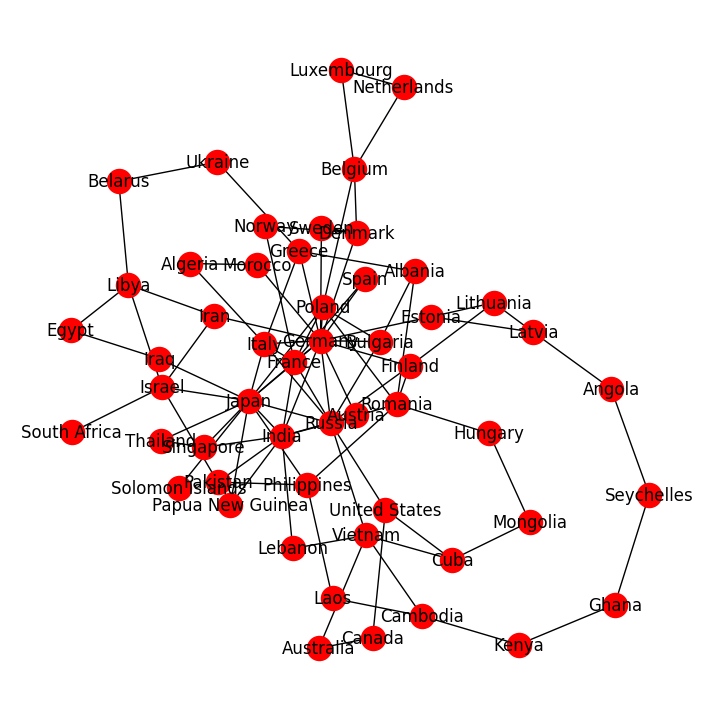

In [4]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

The static graph above depicts nodes and edges from the relationship_df dataframe. However, its appearance is somewhat unappealing and cluttered.

#### Creating an Interactive Visualization

In [10]:
# Define net object, also using repulsion()to avoid posible non-stop flickering of graph

net = Network()
net = Network(notebook = True,width="700px", height="600px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion() 
net.show("Key_events_20th_century.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


The figure above represents a snapshot of the static graph, though it is inherently dynamic.

### Community detection - Leiden algorithm

In [14]:
from cdlib import algorithms
coms = algorithms.leiden(G)

/Users/prateeksharma/anaconda3/envs/20th_century/lib/python3.12/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer', 'graph_tool', 'bayanpy'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [15]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [16]:
new_com = coms.to_node_community_map()

In [20]:
new_com

defaultdict(list,
            {'France': [0],
             'Italy': [0],
             'Germany': [0],
             'Spain': [0],
             'Denmark': [0],
             'Norway': [0],
             'Sweden': [0],
             'Greece': [0],
             'Morocco': [0],
             'Algeria': [0],
             'Estonia': [1],
             'Latvia': [1],
             'Lithuania': [1],
             'Laos': [1],
             'Cambodia': [1],
             'Kenya': [1],
             'Ghana': [1],
             'Seychelles': [1],
             'Angola': [1],
             'Austria': [2],
             'Japan': [2],
             'Thailand': [2],
             'Singapore': [2],
             'Philippines': [2],
             'Solomon Islands': [2],
             'India': [2],
             'Pakistan': [2],
             'Papua New Guinea': [2],
             'Ukraine': [3],
             'Belarus': [3],
             'Libya': [3],
             'Egypt': [3],
             'Iraq': [3],
             'Israel':

In [22]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [24]:
dict_com

{'France': 0,
 'Italy': 0,
 'Germany': 0,
 'Spain': 0,
 'Denmark': 0,
 'Norway': 0,
 'Sweden': 0,
 'Greece': 0,
 'Morocco': 0,
 'Algeria': 0,
 'Estonia': 1,
 'Latvia': 1,
 'Lithuania': 1,
 'Laos': 1,
 'Cambodia': 1,
 'Kenya': 1,
 'Ghana': 1,
 'Seychelles': 1,
 'Angola': 1,
 'Austria': 2,
 'Japan': 2,
 'Thailand': 2,
 'Singapore': 2,
 'Philippines': 2,
 'Solomon Islands': 2,
 'India': 2,
 'Pakistan': 2,
 'Papua New Guinea': 2,
 'Ukraine': 3,
 'Belarus': 3,
 'Libya': 3,
 'Egypt': 3,
 'Iraq': 3,
 'Israel': 3,
 'South Africa': 3,
 'Iran': 3,
 'Hungary': 4,
 'Mongolia': 4,
 'Cuba': 4,
 'United States': 4,
 'Canada': 4,
 'Australia': 4,
 'Vietnam': 4,
 'Lebanon': 4,
 'Russia': 5,
 'Bulgaria': 5,
 'Poland': 5,
 'Finland': 5,
 'Albania': 5,
 'Romania': 5,
 'Belgium': 6,
 'Netherlands': 6,
 'Luxembourg': 6}

In [28]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="800px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("key_events_20th_century_communities_leiden.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


The graph illustrates the interaction between countries as described in the text.

### The most important countries in Key events of 20th century

In [32]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.15384615384615385,
 'Italy': 0.11538461538461539,
 'Russia': 0.21153846153846156,
 'Germany': 0.3076923076923077,
 'Bulgaria': 0.07692307692307693,
 'Austria': 0.057692307692307696,
 'Spain': 0.038461538461538464,
 'Poland': 0.11538461538461539,
 'Estonia': 0.057692307692307696,
 'Latvia': 0.057692307692307696,
 'Lithuania': 0.057692307692307696,
 'Finland': 0.07692307692307693,
 'Belgium': 0.07692307692307693,
 'Netherlands': 0.038461538461538464,
 'Luxembourg': 0.038461538461538464,
 'Denmark': 0.07692307692307693,
 'Norway': 0.038461538461538464,
 'Sweden': 0.038461538461538464,
 'Greece': 0.07692307692307693,
 'Albania': 0.057692307692307696,
 'Ukraine': 0.038461538461538464,
 'Belarus': 0.038461538461538464,
 'Libya': 0.07692307692307693,
 'Egypt': 0.038461538461538464,
 'Iraq': 0.038461538461538464,
 'Japan': 0.25,
 'Morocco': 0.038461538461538464,
 'Algeria': 0.038461538461538464,
 'Thailand': 0.038461538461538464,
 'Singapore': 0.057692307692307696,
 'Philippines':

In [34]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['country','centrality'])

In [36]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

In [38]:
degree_df_filtered = degree_df[degree_df['centrality'] > 0.08]

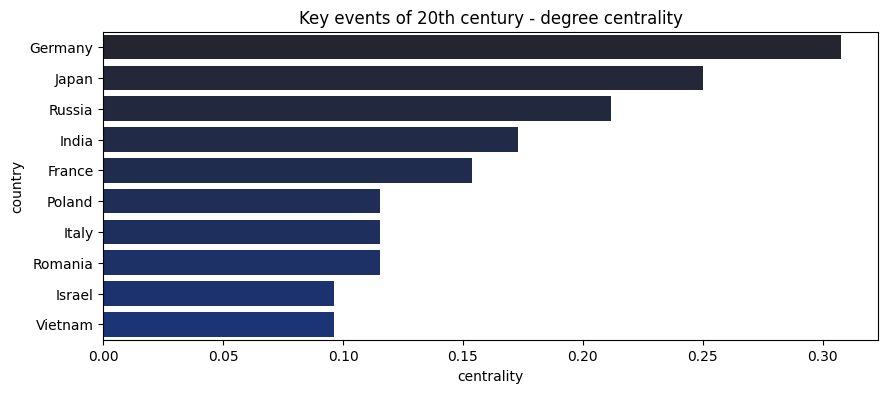

In [40]:
plt.figure(figsize=(10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x="centrality", y="country",
    saturation=0.9, data=degree_df_filtered).set_title("Key events of 20th century - degree centrality")

The bar chart reveals that Germany exhibits the highest degree of centrality, indicating it has the most connections to other characters within the narrative. Following closely behind are Japan and Russia.

In [43]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['country','centrality'])

In [45]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

In [47]:
closeness_df_filtered = closeness_df[closeness_df['centrality'] > 0.35]

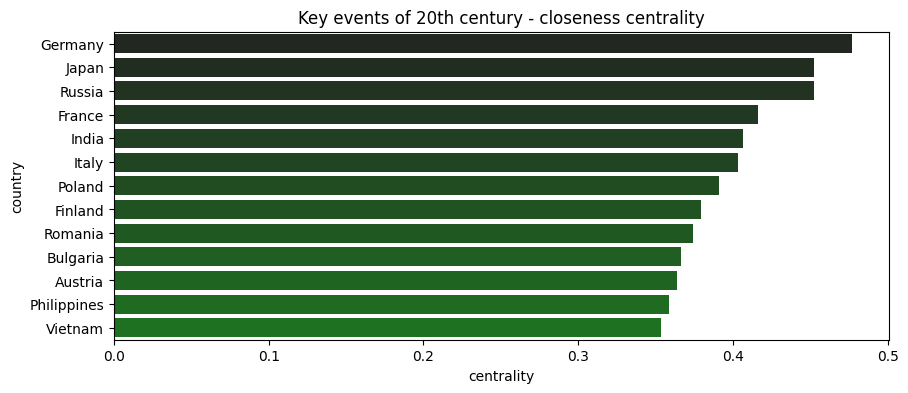

In [49]:
plt.figure(figsize=(10, 4))
with sns.dark_palette("xkcd:green", 22):
    sns.barplot(x="centrality", y="country",
    saturation=0.9, data=closeness_df_filtered).set_title("Key events of 20th century - closeness centrality")

The bar chart displaying countries closeness centrality reveals a similar ranking to that of the degree of centrality, indicating the order of importance remains consistent. However, it's noteworthy that all countries rank highly on the closeness scale. This is likely due to the majority of them being connected to the main country in some way.

In [52]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['country','centrality'])

In [54]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

In [56]:
betweennes_df_filtered = betweennes_df[betweennes_df['centrality'] > 0.05]

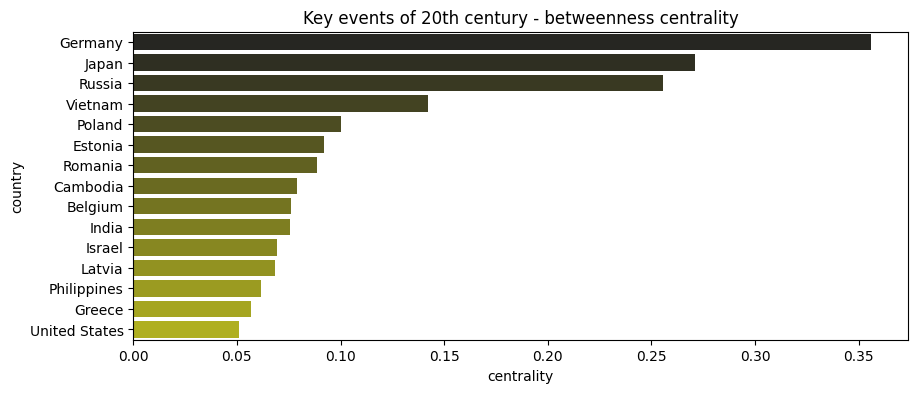

In [58]:
plt.figure(figsize=(10, 4))
with sns.dark_palette("xkcd:yellow", 22):
    sns.barplot(x="centrality", y="country",
    saturation=0.9, data=betweennes_df_filtered).set_title("Key events of 20th century - betweenness centrality")

The bar chart representing countries' betweenness centrality confirms the findings of the closeness centrality scores, highlighting Germany as the most "talked about/influential" country, closely followed by Japan.

In [59]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')